<a href="https://colab.research.google.com/github/QianFu520/project2/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Wine.csv")
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


# Data Cleaning

**Deleted unnecessary columns**

In [3]:
#I decided to delete country column, because there is only one country: Espana, it doesn't make impact on predicting the wine price.
df.drop(columns="country", inplace= True)

**Check and drop any duplicates**

In [4]:
#check for duplicates
df.duplicated().sum()

5452

In [5]:
#Drop all the duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
df.shape

(2048, 10)

# **Identify and address any missing values in this dataset.**


In [7]:
df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

I can see that there are 2 missing values in 'year' column, 106 missing values in "type" column, 271 missing values in "body" column, and 271 missing values in "acidity" column.

**Figure out the method for dealing with the missing values in type column**

In [8]:
#check the value count in type column
df["type"].value_counts()

Ribera Del Duero Red    535
Rioja Red               451
Priorat Red             238
Red                     210
Toro Red                 78
Tempranillo              73
Sherry                   56
Rioja White              37
Pedro Ximenez            35
Grenache                 35
Albarino                 34
Cava                     33
Verdejo                  27
Monastrell               18
Mencia                   17
Montsant Red             17
Syrah                    15
Chardonnay               13
Cabernet Sauvignon       11
Sparkling                 5
Sauvignon Blanc           4
Name: type, dtype: int64

In [9]:
df["type"].mode() #find out the most frequent type

0    Ribera Del Duero Red
dtype: object

The most frequent type is Ribera Del Duero Red, I will fill the missing values with Del Duero Red. I will address this after the data split.

**Figure out the method for dealing with the missing values in body and acidity column**

In [10]:
#check the stats information of body column
df["body"].describe().round(1)

count    1777.0
mean        4.3
std         0.7
min         2.0
25%         4.0
50%         4.0
75%         5.0
max         5.0
Name: body, dtype: float64

In [11]:
#check the most frequent value 
df["body"].value_counts()

4.0    1003
5.0     634
3.0     106
2.0      34
Name: body, dtype: int64

I can see that the most frequent body value is 4.0, the mean value of the body is around 4.3. I can use the SimpleImputer(strategy= 'mean') method to fill in the missing values in body column.I will address this after the data split

In [12]:
#check the stats information of acidity column
df["acidity"].describe().round(1)

count    1777.0
mean        2.9
std         0.3
min         1.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: acidity, dtype: float64

In [13]:
#check the most frequent value
df["acidity"].value_counts()

3.0    1672
2.0      70
1.0      35
Name: acidity, dtype: int64

I can see that the most frequent acidity value is 3.0, the mean value of the body is around 2.9. I can use the SimpleImputer(strategy= 'mean') method to fill in the missing values in acidity column.I will address this after the data split

# Identified and corrected inconsistencies in data for categorical values

In [14]:
dtypes = df.dtypes
str_cols = dtypes[dtypes=="object"].index
for col in str_cols:
  print(f'-Column={col}')
  print(df[col].value_counts(dropna=False))
  print('\n\n')

-Column=winery
Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64



-Column=wine
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero             1


I can't tell there are inconsistencies in data for categorical values

# Ensure all columns data types are correct

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2048 non-null   object 
 1   wine         2048 non-null   object 
 2   year         2046 non-null   object 
 3   rating       2048 non-null   float64
 4   num_reviews  2048 non-null   int64  
 5   region       2048 non-null   object 
 6   price        2048 non-null   float64
 7   type         1942 non-null   object 
 8   body         1777 non-null   float64
 9   acidity      1777 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 176.0+ KB


I can see that the data type of "year" column is not correct. I will change it from object to inter.

In [16]:
df["year"] = df["year"].astype(int)
df.dtypes

ValueError: ignored

In [17]:
df.loc[df["year"]=="N.V.", :]

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
20,Valdespino,Toneles Moscatel,N.V.,4.8,174,Jerez-Xeres-Sherry,253.00,Sherry,4.0,3.0
133,Barbadillo,Reliquia Palo Cortado Sherry,N.V.,4.7,58,Jerez Palo Cortado,380.00,Sherry,4.0,3.0
142,Alvear,Abuelo Diego Palo Cortado,N.V.,4.7,42,Montilla-Moriles,114.28,Pedro Ximenez,5.0,1.0
143,Equipo Navazos,La Bota 78 de Oloroso,N.V.,4.7,41,Manzanilla,95.57,Sherry,4.0,3.0
267,Osborne,Solera India Oloroso Rare Sherry,N.V.,4.6,74,Jerez-Xeres-Sherry,189.99,Sherry,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1942,Williams & Humbert,Dos Cortados Palo Cortado Solera Especial Aged...,N.V.,4.2,666,Jerez Palo Cortado,32.16,Sherry,4.0,3.0
1971,Fernando de Castilla,Antique Palo Cortado,N.V.,4.2,519,Jerez Palo Cortado,36.90,Sherry,4.0,3.0
1979,Williams & Humbert,Jalifa Amontillado Rare Old Dry Solera Especia...,N.V.,4.2,487,Jerez Amontillado,33.50,Sherry,4.0,3.0
2012,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Jerez-Xeres-Sherry,7.10,Sherry,NaN,NaN


I checked the data dictionary, it doesn't tell what "N.V." means here. So I guess it means "NaN". I will change it to "NaN", then figure out a method to deal with these missing values.

In [18]:
df["year"] = df["year"].replace("N.V.", np.NaN)

In [19]:
df["year"] = df["year"].astype(float)
df.dtypes

winery          object
wine            object
year           float64
rating         float64
num_reviews      int64
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

In [20]:
df.isna().sum()

winery           0
wine             0
year            72
rating           0
num_reviews      0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

**Figure out the method for dealing with the missing values in year column**



In [22]:
missing_values = pd.isna(df["year"])
df[missing_values]

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
20,Valdespino,Toneles Moscatel,NaN,4.8,174,Jerez-Xeres-Sherry,253.00,Sherry,4.0,3.0
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Ribera del Duero,423.50,Ribera Del Duero Red,5.0,3.0
133,Barbadillo,Reliquia Palo Cortado Sherry,NaN,4.7,58,Jerez Palo Cortado,380.00,Sherry,4.0,3.0
142,Alvear,Abuelo Diego Palo Cortado,NaN,4.7,42,Montilla-Moriles,114.28,Pedro Ximenez,5.0,1.0
143,Equipo Navazos,La Bota 78 de Oloroso,NaN,4.7,41,Manzanilla,95.57,Sherry,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1942,Williams & Humbert,Dos Cortados Palo Cortado Solera Especial Aged...,NaN,4.2,666,Jerez Palo Cortado,32.16,Sherry,4.0,3.0
1971,Fernando de Castilla,Antique Palo Cortado,NaN,4.2,519,Jerez Palo Cortado,36.90,Sherry,4.0,3.0
1979,Williams & Humbert,Jalifa Amontillado Rare Old Dry Solera Especia...,NaN,4.2,487,Jerez Amontillado,33.50,Sherry,4.0,3.0
2012,Lustau,Candela Cream Dulce Sweet,NaN,4.2,405,Jerez-Xeres-Sherry,7.10,Sherry,NaN,NaN


In [23]:
df.loc[df["type"]=="Sherry", :]

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
20,Valdespino,Toneles Moscatel,NaN,4.8,174,Jerez-Xeres-Sherry,253.00,Sherry,4.0,3.0
133,Barbadillo,Reliquia Palo Cortado Sherry,NaN,4.7,58,Jerez Palo Cortado,380.00,Sherry,4.0,3.0
135,Gonzalez-Byass,Anada Palo Cortado 1987,1987.0,4.7,53,Jerez Palo Cortado,400.85,Sherry,4.0,3.0
143,Equipo Navazos,La Bota 78 de Oloroso,NaN,4.7,41,Manzanilla,95.57,Sherry,4.0,3.0
267,Osborne,Solera India Oloroso Rare Sherry,NaN,4.6,74,Jerez-Xeres-Sherry,189.99,Sherry,4.0,3.0
298,Bodegas Yuste,Conde de Aldama Amontillado,NaN,4.6,46,Jerez-Xeres-Sherry,89.90,Sherry,4.0,3.0
346,Osborne,Solera BC-200,NaN,4.6,25,Jerez-Xeres-Sherry,197.30,Sherry,4.0,3.0
455,Tio Pepe,Cuatro Palmas Amontillado,NaN,4.5,186,Jerez Amontillado,112.26,Sherry,4.0,3.0
517,Diez Merito,Fino Imperial Amontillado 30 Anos,NaN,4.5,81,Jerez Amontillado,94.90,Sherry,4.0,3.0
518,Valdespino,Coliseo Amontillado VORS,NaN,4.5,81,Jerez Amontillado,199.00,Sherry,4.0,3.0


In [24]:
df.loc[df["type"]=="Sherry", :].shape

(56, 10)

I found that 56 our 72 missing values in year column are the same type "sherry". There is two year"1987", "1991" of sherry type. I decided to pick one of the two:1987 to fill in the missing values. I will do this after data split.

# Produced univariate visuals for the target and all features

**Visuals for target: Price**

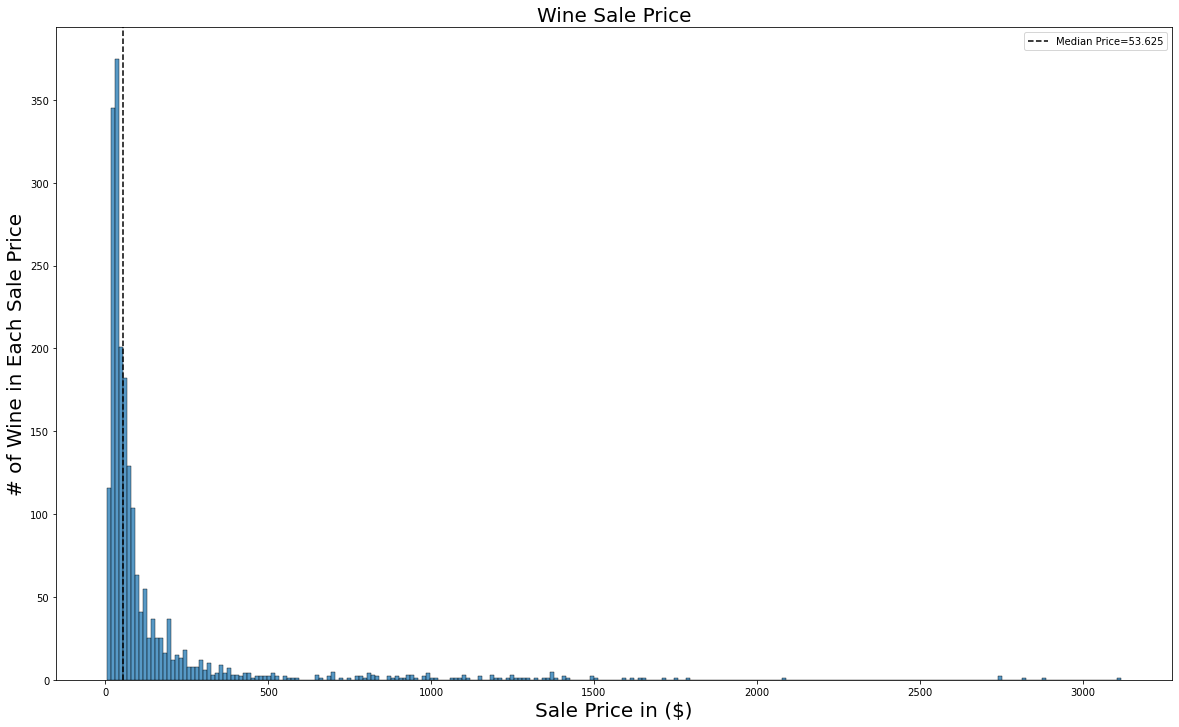

In [40]:
#Visualization1: Use Histogram to look at the distribution of Price
fig, ax = plt.subplots(figsize=(20,12))
sns.histplot(data=df, x="price")
plt.xlabel('Sale Price in ($)', fontsize=20)
plt.ylabel('# of Wine in Each Sale Price', fontsize=20)
plt.title('Wine Sale Price', fontsize=20)
plt.axvline(df['price'].median(), color='black', linestyle='--', label=f"Median Price={df['price'].median()}")
plt.legend()   

From the shape of the price's histogram, I can see that a lot of the wine price is under about 200. Most of the wine price is under 500. There are few wine price is above 500 and fewer wine price is above 1000 or 1500.

count    2048.000000
mean      135.242194
std       272.178316
min         4.990000
25%        31.917947
50%        53.625000
75%       110.000000
max      3119.080000
Name: price, dtype: float64


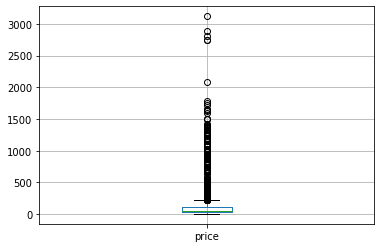

In [32]:
#Visualization2: use boxplot to look if there is outliers in Price.
df.boxplot(column="price")
print(df["price"].describe())

# Finding 'Minimum' and 'Maximum' and Outliers
According to the results of our df.describe() above:


1.   First Quartile (Q1) = 32
2.   Third Quartile (Q3) = 110
3.  Interquartile Range (IQR) = Q3 - Q1 = 78
4.   1.5 * IQR = 120
5. 'Minimum' (before outliers) is Q1 - 78 = -46
6. 'Maximum' (before outliers) is Q3 + 78 = 188

Notice below that the lower whisker is at 0, which is the actual minimum value (the plot does not cover non-existent values), and the upper whisker is at 188.

We can see there are lot of outliers above 188.

**Univariate Visuals for all features**


*   Cat_features:Winery, wine, region, type
*   num_features: rating, num_reviws, body, acidity, year



**Use Histograms to look at the distribution of the cat_features**

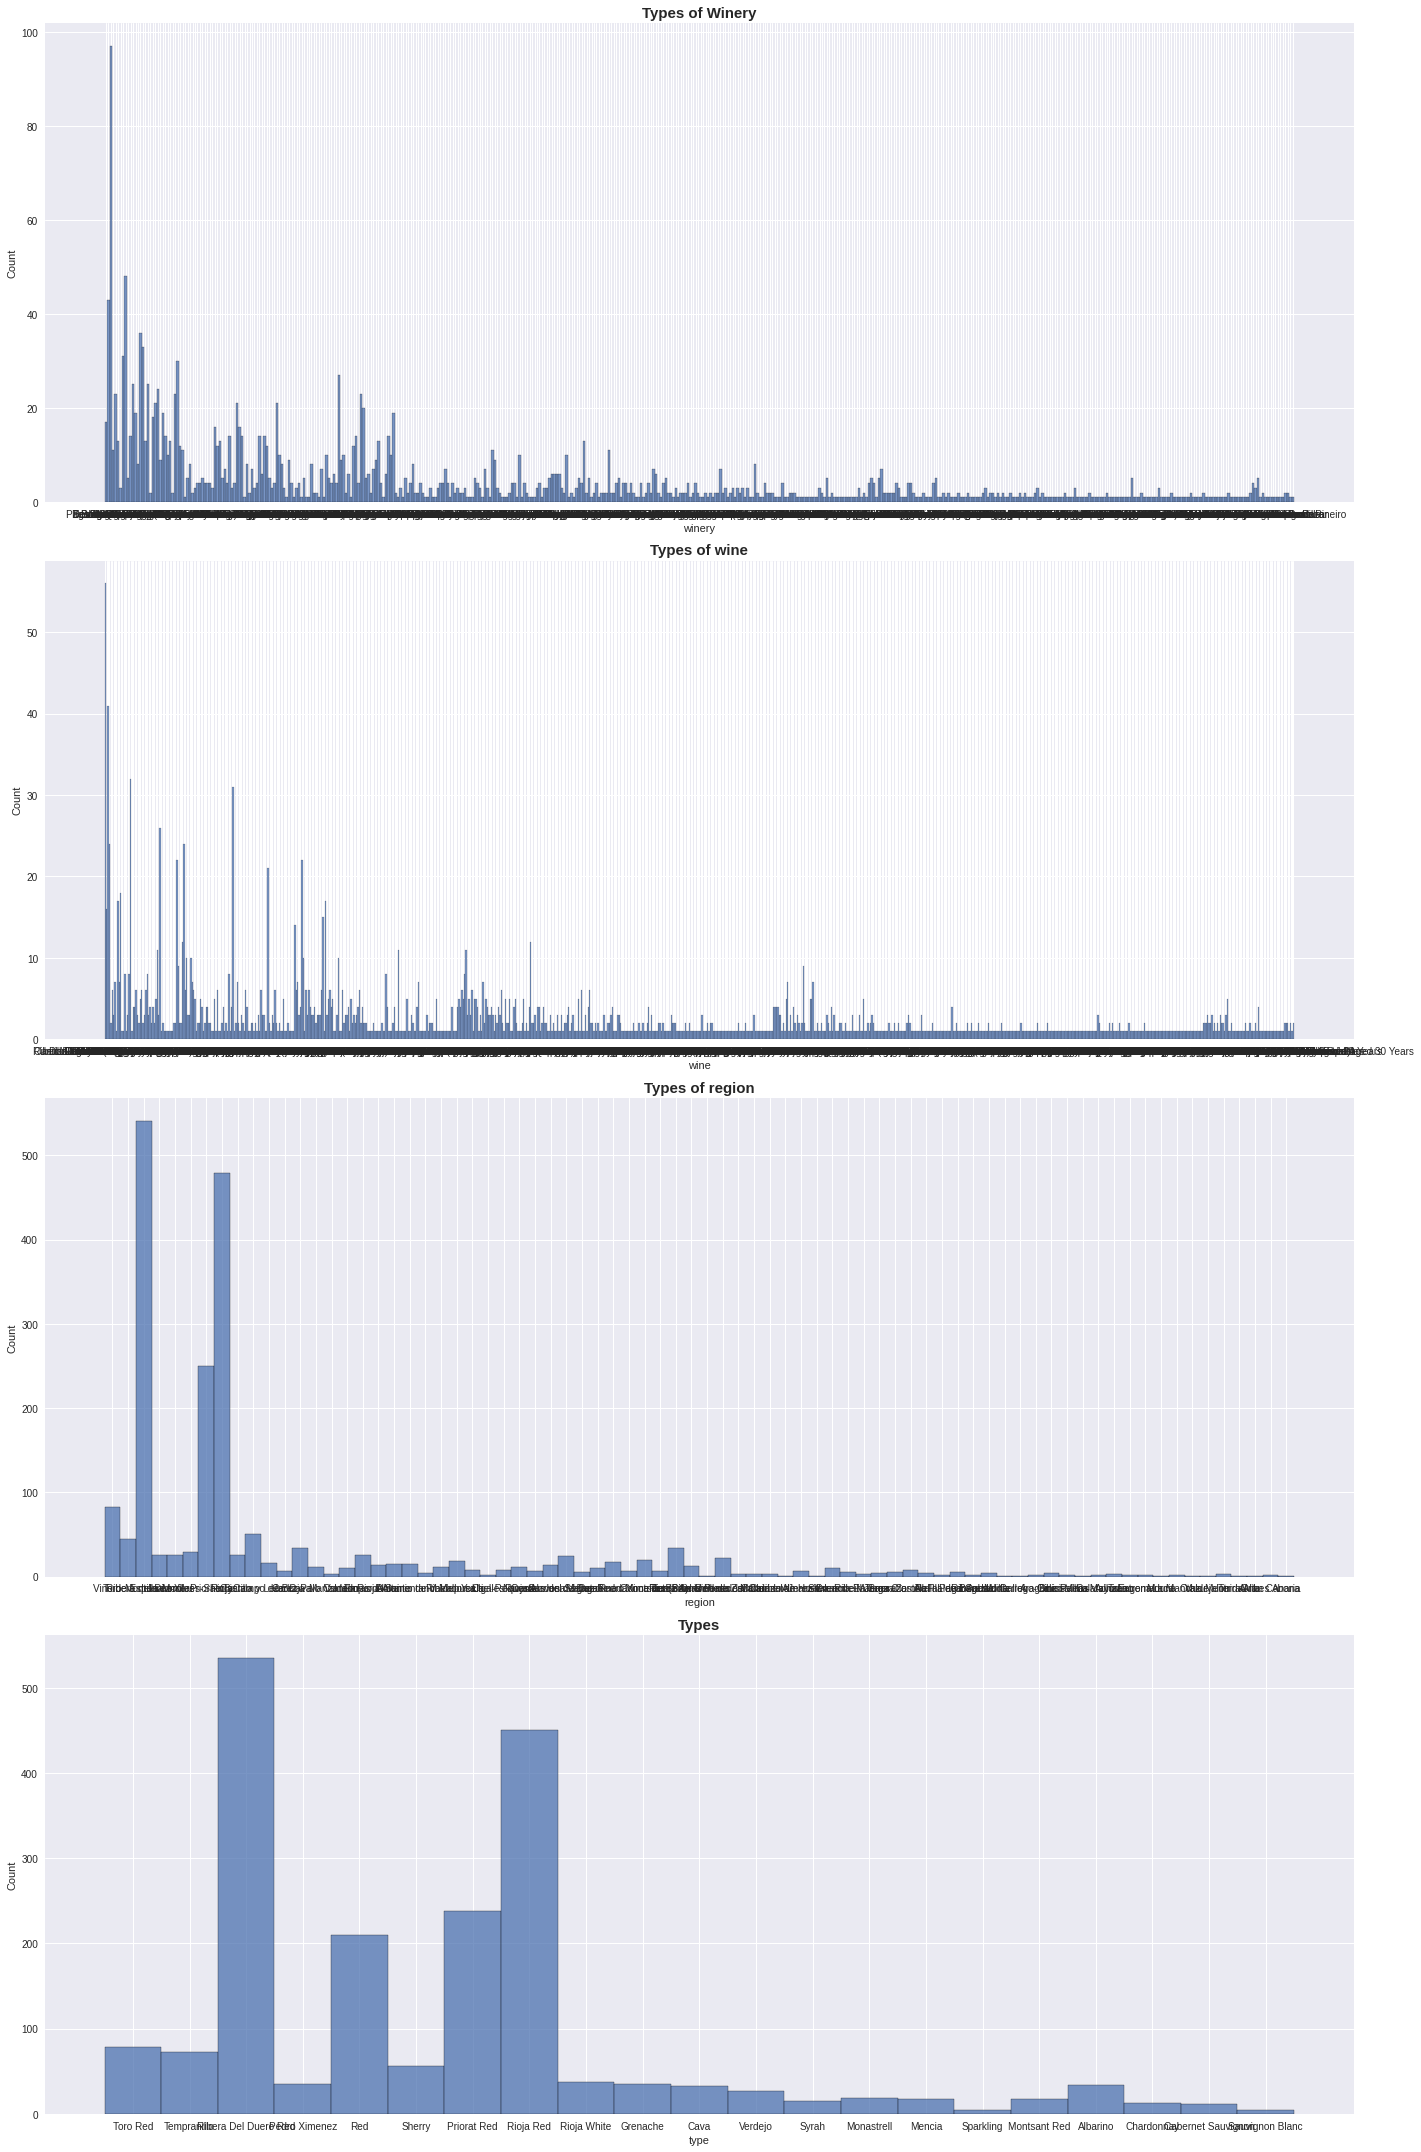

In [69]:
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=4, figsize=(20,30))
sns.histplot(data=df, x="winery", ax=axes[0])
axes[0].set_title('Types of Winery', fontsize=15, fontweight='bold')

sns.histplot(data=df, x="wine", ax=axes[1])
axes[1].set_title('Types of wine', fontsize=15, fontweight='bold')

sns.histplot(data=df, x="region", ax=axes[2])
axes[2].set_title('Types of region', fontsize=15, fontweight='bold')

sns.histplot(data=df, x="type", ax=axes[3])
axes[3].set_title('Types', fontsize=15, fontweight='bold')
fig.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]), <a list of 70 Text major ticklabel objects>)

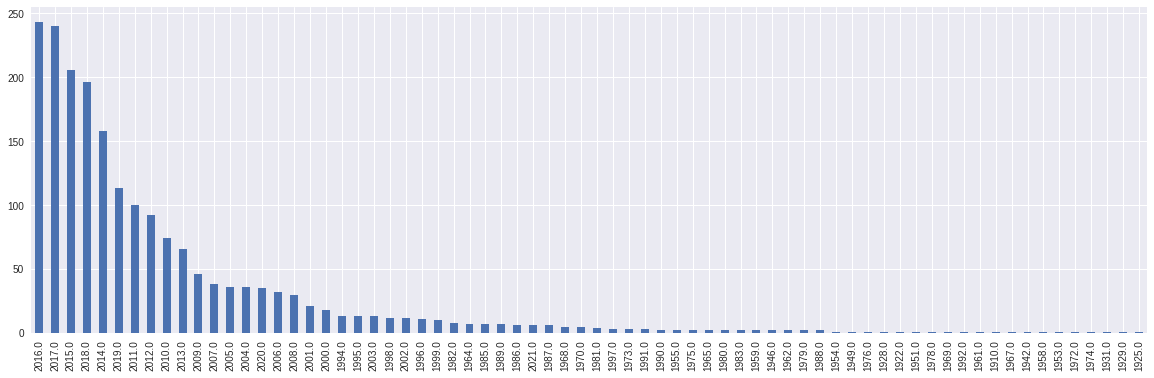

In [82]:
#Use Histogram to look at the distribution of year
year_counts = df['year'].value_counts()
fig, ax = plt.subplots(figsize=(20, 6))
year_counts.plot(kind = 'bar')
plt.xticks(rotation=90)


**Use boxplots to look if there are outliers in num_features and group by type.**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

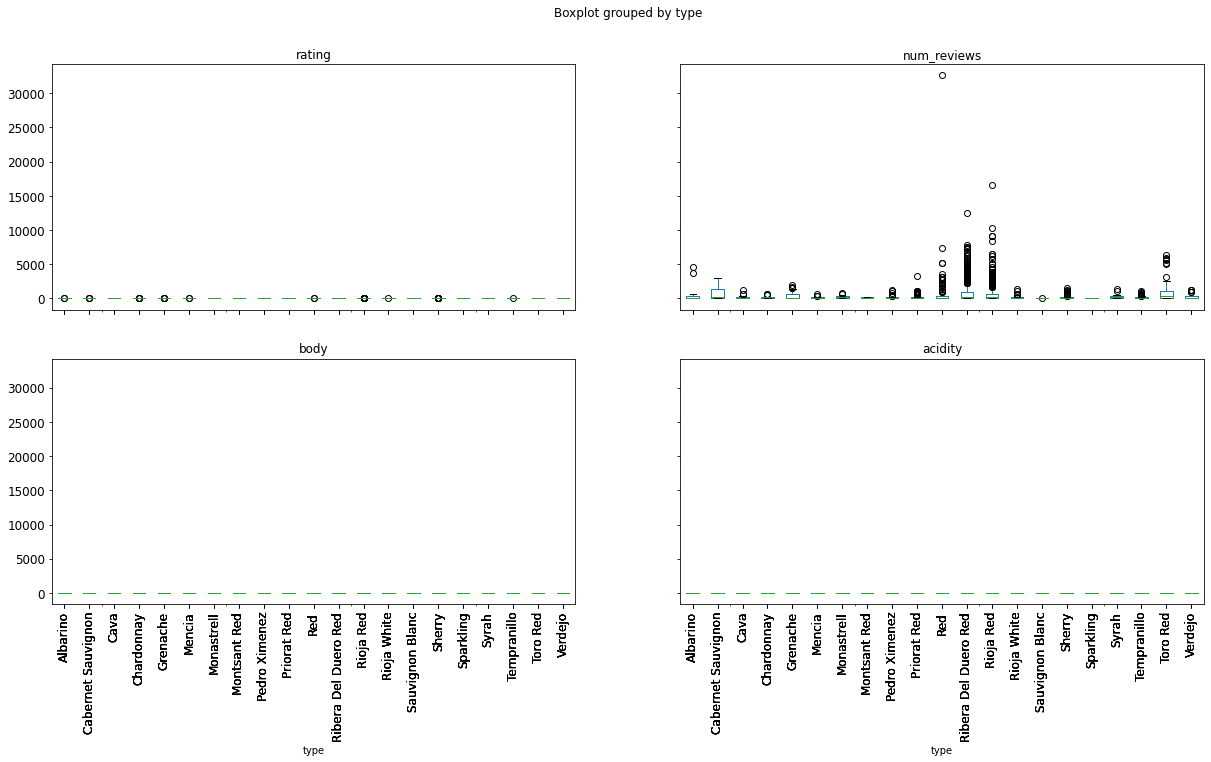

In [43]:
df.boxplot(["rating", "num_reviews", "body", "acidity"], by = "type", figsize = (20,10), fontsize = 12, rot=90, grid=False)
plt.show()

From the above boxplots I can see that only num_reviews has some outliers in some wine types.